## stockfish

In [122]:
from stockfish import Stockfish
import numpy as np

In [2]:
import os

In [3]:
os.getcwd()

'/home/oscar/Documents/Stockfish'

In [165]:
stockfish = Stockfish( depth=15, parameters={"Threads": 2, "Minimum Thinking Time": 30})


In [47]:
stockfish.get_fen_position()


'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

In [48]:
print(stockfish.get_board_visual())

+---+---+---+---+---+---+---+---+
| r | n | b | q | k | b | n | r |
+---+---+---+---+---+---+---+---+
| p | p | p | p | p | p | p | p |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
| P | P | P | P | P | P | P | P |
+---+---+---+---+---+---+---+---+
| R | N | B | Q | K | B | N | R |
+---+---+---+---+---+---+---+---+



The idea is to train starting from this position

In [49]:
stockfish.set_fen_position("3k4/pppppppp/8/8/8/8/PPPPPPPP/4K3 w - - 0 1")

In [50]:
%%time
stockfish.get_best_move()

CPU times: user 0 ns, sys: 4.44 ms, total: 4.44 ms
Wall time: 289 ms


'a2a4'

We can also tune some of the parameters 

In [51]:
stockfish.get_parameters()

{'Write Debug Log': 'false',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Threads': 3,
 'Ponder': 'false',
 'Hash': 16,
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 30,
 'Minimum Thinking Time': 30,
 'Slow Mover': 80,
 'UCI_Chess960': 'false'}

And evaluate the board to see who has an advantage.

In [52]:
stockfish.get_evaluation()

{'type': 'cp', 'value': 73}

After the first suggested move, a2a4, we get a new board,

In [53]:
stockfish.set_fen_position("3k4/pppppppp/8/8/P7/8/1PPPPPPP/4K3 b - - 0 1")

In [54]:
print(stockfish.get_board_visual())

+---+---+---+---+---+---+---+---+
|   |   |   | k |   |   |   |   |
+---+---+---+---+---+---+---+---+
| p | p | p | p | p | p | p | p |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
| P |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   | P | P | P | P | P | P | P |
+---+---+---+---+---+---+---+---+
|   |   |   |   | K |   |   |   |
+---+---+---+---+---+---+---+---+



In [55]:
stockfish.get_evaluation()

{'type': 'cp', 'value': -37}

And we can evaluate an alternative move,

In [56]:
stockfish.set_fen_position("3k4/pppppppp/8/8/2P5/8/PP1PPPPP/4K3 b - - 0 1")

In [57]:
print(stockfish.get_board_visual())

+---+---+---+---+---+---+---+---+
|   |   |   | k |   |   |   |   |
+---+---+---+---+---+---+---+---+
| p | p | p | p | p | p | p | p |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   | P |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
| P | P |   | P | P | P | P | P |
+---+---+---+---+---+---+---+---+
|   |   |   |   | K |   |   |   |
+---+---+---+---+---+---+---+---+



In [58]:
stockfish.get_evaluation()

{'type': 'cp', 'value': -36}

In [59]:
stockfish.set_fen_position("3k4/pppppppp/8/8/2P5/8/PP1PPPPP/4K3 b - - 0 1")
print(stockfish.get_board_visual())
stockfish.get_evaluation()

+---+---+---+---+---+---+---+---+
|   |   |   | k |   |   |   |   |
+---+---+---+---+---+---+---+---+
| p | p | p | p | p | p | p | p |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   | P |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
| P | P |   | P | P | P | P | P |
+---+---+---+---+---+---+---+---+
|   |   |   |   | K |   |   |   |
+---+---+---+---+---+---+---+---+



{'type': 'cp', 'value': -54}

## Env for training 

After trying at least 3 called gym-chess, thought that the GYM part of it is unnecesary, and that some regular chess might be actually better in terms of optimization. Here's the one I liked the most so far, just python-chess.

In [49]:
!pip3 install chess

     |████████████████████████████████| 141 kB 3.0 MB/s eta 0:00:01


In [60]:
import chess

In [61]:
board = chess.Board()

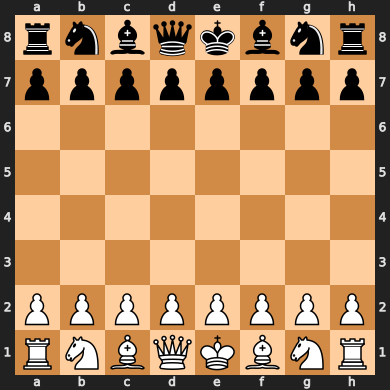

In [62]:
board

We can make moves

In [63]:
board.push_san("e4")

Move.from_uci('e2e4')

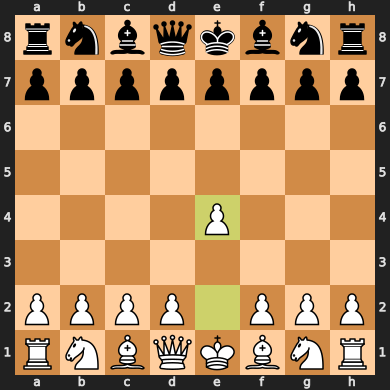

In [64]:
board

Get legal moves

In [65]:
board.legal_moves

<LegalMoveGenerator at 0x7fd652a180a0 (Nh6, Nf6, Nc6, Na6, h6, g6, f6, e6, d6, c6, b6, a6, h5, g5, f5, e5, d5, c5, b5, a5)>

Export so we can send the board to stockfish

In [66]:
board.fen()

'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1'

Load from a custom position,

In [214]:
board = chess.Board("3k4/pppppppp/8/8/8/8/PPPPPPPP/4K3 w - - 0 1")

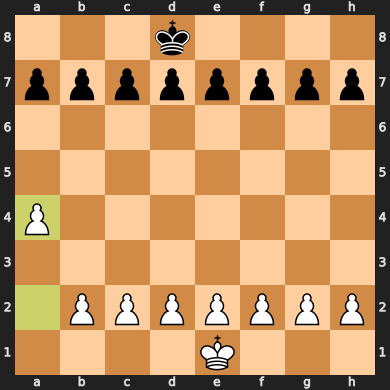

In [217]:
board

In [112]:
stockfish.set_fen_position(board.fen())

stockfish.get_evaluation()

{'type': 'cp', 'value': 74}

## Data generation loop

Have stockfish play itself, record game and p(move) for every move.

In [349]:
game_data = {} #store boards played and their positions. global variable that can be recycled across games.
game_records = []

# Start of a game here


game_moves = [] #store actual game moves
n_moves = 0
# Set initial board and player
board = chess.Board("4k3/pppppppp/8/8/8/8/PPPPPPPP/4K3 w - - 0 1")
next_white = True

while n_moves < 200 and not board.is_checkmate():
    print(n_moves)
    stockfish = Stockfish( depth=14, parameters={"Threads": 2, "Minimum Thinking Time": 30})
    if n_moves % 5 == 0:
        print(board)
        print('----------------')
    else:
        print(n_moves)
    position = board.fen()
    # First we check if we've ever seen the board before
    if position in game_data:
        # No need to re-evaluate the position
        ps = game_data[position]['ps']
        moves = game_data[position]['moves']
    else:
        scores = []
        moves = [move for move in board.legal_moves]
        # Explore possible moves
        for legal_move in moves:
            # Try move
            temp_board = chess.Board(position)
            temp_board.push(legal_move)            
            stockfish.set_fen_position(temp_board.fen())
            score = stockfish.get_evaluation()['value']
            scores.append(score) 
        # Normalize scores
        scores = np.array(scores)
        old_scores = scores
        # Higher score means white is winning, so we must reverse if black plays next
        max_score, min_score = np.max(scores), np.min(scores)
        if next_white == False:
            scoring = scores - np.abs(max_score)
            scoring = - scoring
        else:
            scoring = scores + np.abs(min_score)
        ps = scoring / np.sum(scoring)
        # Take a move with p(move)=score
        game_data[position] = {
            'ps': ps,
            'moves': moves,
            'scores': scores,
            'old_scores': old_scores
        }
    # With the board analyzed, we pick which move to pick
    move = np.random.choice(moves, p=ps)
    board.push(move)
    next_white = not next_white
    # Store the move played in the game record.
    game_moves.append(move)
    n_moves += 1


0
. . . . k . . .
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
. . . . K . . .
----------------
1
1
2
2
3
3
4
4
5
. . . . k . . .
p p . p p p p .
. . . . . . . .
. . p . . . . p
P . . P . . . .
. . . . P . . .
. P P . . P P P
. . . . K . . .
----------------
6
6
7
7
8
8
9
9
10
. . . k . . . .
. p . p p p p .
p . . . . . . .
. . . . . . . p
P . p P . . . .
. . . . P . . .
. P P . . P P P
. . . . K . . .
----------------
11
11
12
12
13
13
14
14
15
. . . . . . . .
. p k p p p p .
p . . . . . . .
. . . . . . . .
P . p P P . . p
. . K . . . . .
. P P . . P P P
. . . . . . . .
----------------
16
16
17
17
18
18
19
19
20
. . . . . . . .
. . . p p p p .
p k . . . . . .
. . . P . . . .
p . p . P . P p
. . K . . . . .
. P P . . P . P
. . . . . . . .
----------------
21
21
22
22
23
23
24
24
25
. . . . . . . .
. . . p p . p .
p . . . . p . .
. k . P . . . .
p . P K P . P p
. . . . . . . .
. . P . . P . P
. . . . . . . .
----------------
26
26
27
2

Exception ignored in: <function Stockfish.__del__ at 0x7fd6680668b0>
Traceback (most recent call last):
  File "/home/oscar/.local/lib/python3.8/site-packages/stockfish/models.py", line 285, in __del__
    self._put("quit")
  File "/home/oscar/.local/lib/python3.8/site-packages/stockfish/models.py", line 70, in _put
    self.stockfish.stdin.flush()
BrokenPipeError: [Errno 32] Broken pipe


87
87
88
88
89
89
90
. . . . . . . .
k . . K . . . .
. . . . p . . .
. . p . p . P .
. . . . . . . .
. . . . . . R P
q . . . . . . .
. . . . . . . .
----------------
91
91
92
92
93
93
94
94
95
. . . . . . . .
k . . . . . . .
. . . K p . . .
. . . . p . P .
. . p . . . . P
. . . R . . . .
. . . . . q . .
. . . . . . . .
----------------
96
96
97
97
98
98
99
99
100
. . . . . . . .
k . . . . . . .
. . . K p . . .
. . . . p . P .
. . . R . . . P
. . p . . . . q
. . . . . . . .
. . . . . . . .
----------------
101
101
102
102
103
103
104
104
105
. . . . . . . .
k . . . . . . .
. . K . p . . .
. . . . p . P .
. R . . . . . P
. . p . . . . q
. . . . . . . .
. . . . . . . .
----------------
106
106
107
107
108
108
109
109
110
. . . . . . . .
k . . . . . . .
. . . . p . . .
. . K . p . P .
. . . R . . . P
. . p . . . . .
. . . . . . . .
. . . . . . . q
----------------
111
111
112
112
113
113
114
114
115
. . . . . . . .
k . . . . . . .
. . . . p . . .
. . . . p . P .
. . K . . . . P
. . p . . .

## Other debugging things

In [173]:
board = chess.Board("4k3/pppppppp/8/8/8/8/PPPPPPPP/4K3 w - - 0 1")
for move in game_moves:
    board.push(move)
    boar

In [344]:
a = game_data['4k3/2pp4/pp3ppp/4p3/PP1P4/2P2P2/4PKPP/8 b - - 0 7']
[(a['ps'][i],a['moves'][i], a['scores'][i], a['old_scores'][i]) for i in range(len(a['ps']))]

[(0.0641842234198922, Move.from_uci('e8f8'), 81, 81),
 (0.06075453209211171, Move.from_uci('e8d8'), 74, 74),
 (0.05438510534051935, Move.from_uci('e8f7'), 61, 61),
 (0.053405193532582065, Move.from_uci('e8e7'), 59, 59),
 (0.04899559039686428, Move.from_uci('e5d4'), 50, 50),
 (0.059284664380205784, Move.from_uci('d7d6'), 71, 71),
 (0.05438510534051935, Move.from_uci('c7c6'), 61, 61),
 (0.05977462028417443, Move.from_uci('h6h5'), 72, 72),
 (0.06075453209211171, Move.from_uci('g6g5'), 74, 74),
 (0.11268985791278785, Move.from_uci('f6f5'), 180, 180),
 (0.061734443900048994, Move.from_uci('b6b5'), 76, 76),
 (0.05683488486036257, Move.from_uci('a6a5'), 66, 66),
 (0.12297893189612935, Move.from_uci('e5e4'), 201, 201),
 (0.05389514943655071, Move.from_uci('d7d5'), 60, 60),
 (0.07594316511513964, Move.from_uci('c7c5'), 105, 105)]

8/k7/4p3/6P1/2K1p2P/2p5/6R1/1q6 b - - 3 60
8/k7/4p3/6P1/2K1p2P/2p5/1q4R1/8 w - - 4 61


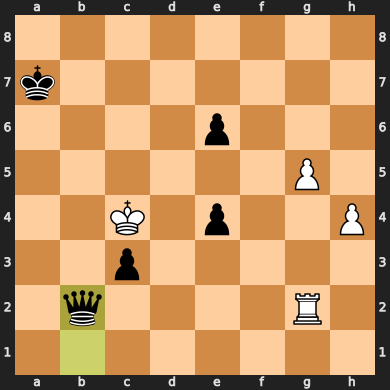

In [355]:
board = chess.Board("4k3/pppppppp/8/8/8/8/PPPPPPPP/4K3 w - - 0 1")
n = 120
for i in range(n):
    move = game_moves[i]
    if i >= n-1:
        print(board.fen())
    board.push(move)
print(board.fen())
board

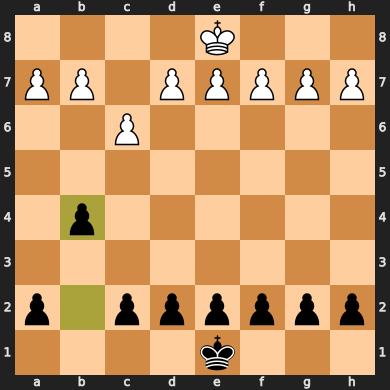

In [187]:
board = chess.Board("4K3/PPPPPPPP/8/8/8/8/pppppppp/4k3 w - - 0 1")
for move in game_moves[:2]:
    board.push(move)
board

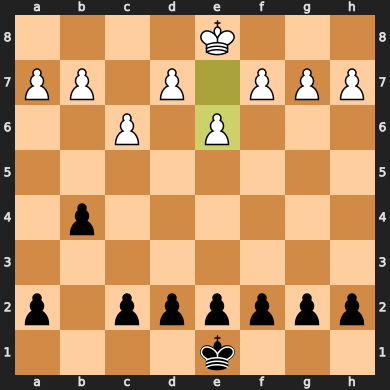

In [188]:
board = chess.Board("4K3/PPPPPPPP/8/8/8/8/pppppppp/4k3 w - - 0 1")
for move in game_moves[:3]:
    board.push(move)
board

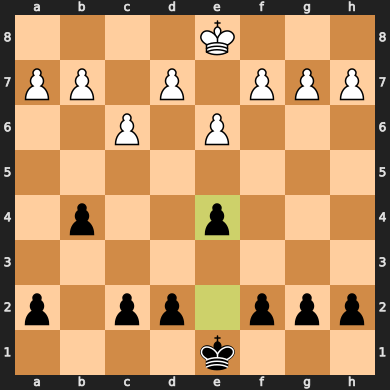

In [189]:
board = chess.Board("4K3/PPPPPPPP/8/8/8/8/pppppppp/4k3 w - - 0 1")
for move in game_moves[:4]:
    board.push(move)
board

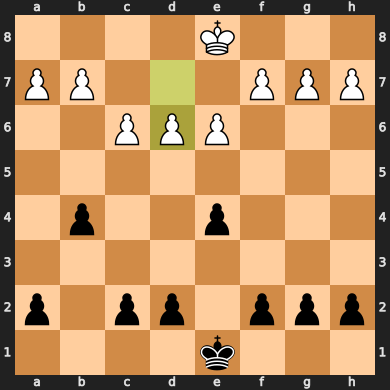

In [193]:
n = 5
board = chess.Board("4K3/PPPPPPPP/8/8/8/8/pppppppp/4k3 w - - 0 1")
for move in game_moves[:n]:
    board.push(move)
board

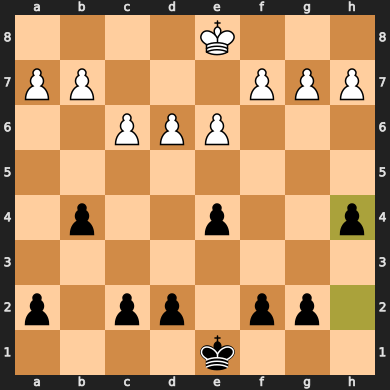

In [194]:
n = 6
board = chess.Board("4K3/PPPPPPPP/8/8/8/8/pppppppp/4k3 w - - 0 1")
for move in game_moves[:n]:
    board.push(move)
board

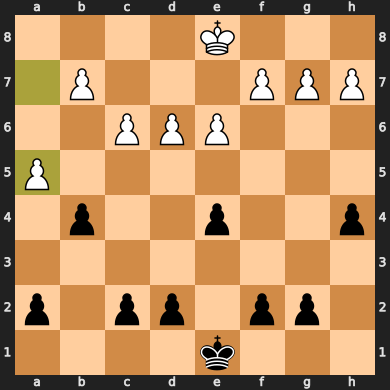

In [195]:
n = 7
board = chess.Board("4K3/PPPPPPPP/8/8/8/8/pppppppp/4k3 w - - 0 1")
for move in game_moves[:n]:
    board.push(move)
board

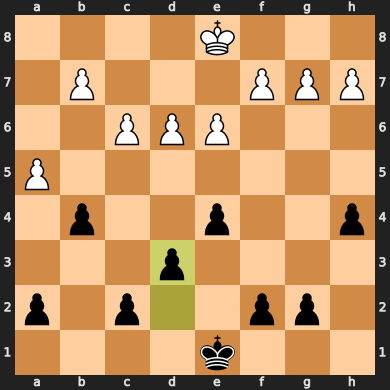

In [196]:
n = 8
board = chess.Board("4K3/PPPPPPPP/8/8/8/8/pppppppp/4k3 w - - 0 1")
for move in game_moves[:n]:
    board.push(move)
board

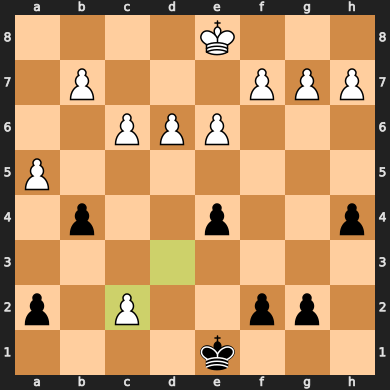

In [197]:
n = 9
board = chess.Board("4K3/PPPPPPPP/8/8/8/8/pppppppp/4k3 w - - 0 1")
for move in game_moves[:n]:
    board.push(move)
board